## Random forest (Classical ready)

In [754]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline

In [755]:
df = pd.read_csv("neo_v2.csv")
df

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True
...,...,...,...,...,...,...,...,...,...,...
90831,3763337,(2016 VX1),0.026580,0.059435,52078.886692,1.230039e+07,Earth,False,25.00,False
90832,3837603,(2019 AD3),0.016771,0.037501,46114.605073,5.432121e+07,Earth,False,26.00,False
90833,54017201,(2020 JP3),0.031956,0.071456,7566.807732,2.840077e+07,Earth,False,24.60,False
90834,54115824,(2021 CN5),0.007321,0.016370,69199.154484,6.869206e+07,Earth,False,27.80,False


In [756]:
df.describe()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,9.083600e+04,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000
mean,1.438288e+07,0.127432,0.284947,48066.918918,3.706655e+07,23.527103
std,2.087202e+07,0.298511,0.667491,25293.296961,2.235204e+07,2.894086
min,2.000433e+06,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,3.448110e+06,0.019256,0.043057,28619.020645,1.721082e+07,21.340000
50%,3.748362e+06,0.048368,0.108153,44190.117890,3.784658e+07,23.700000
75%,3.884023e+06,0.143402,0.320656,62923.604633,5.654900e+07,25.700000
max,5.427591e+07,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


In [757]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


In [758]:
df.isnull().sum()

id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64

<AxesSubplot:>

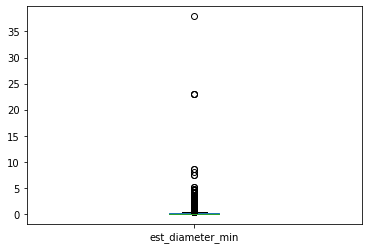

In [759]:
df.est_diameter_min.plot(kind='box')

<AxesSubplot:>

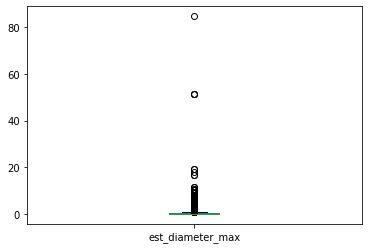

In [760]:
df.est_diameter_max.plot(kind='box')

<AxesSubplot:>

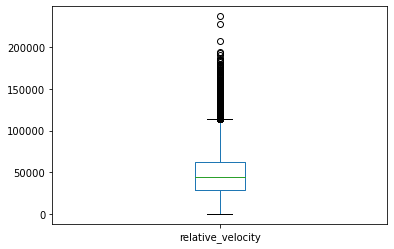

In [761]:
df.relative_velocity.plot(kind='box')

<AxesSubplot:>

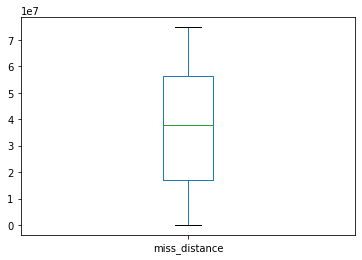

In [762]:
df.miss_distance.plot(kind='box')

<AxesSubplot:>

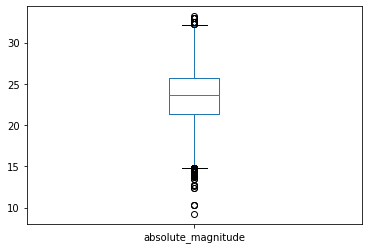

In [763]:
df.absolute_magnitude.plot(kind='box')

In [764]:
df.hazardous.value_counts(normalize=True)

False    0.902682
True     0.097318
Name: hazardous, dtype: float64

In [765]:
df.hazardous.value_counts()

False    81996
True      8840
Name: hazardous, dtype: int64

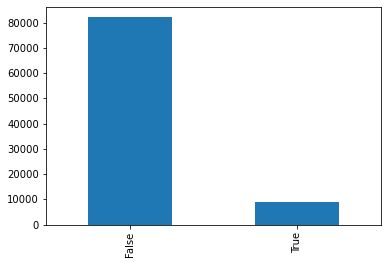

In [766]:
df.hazardous.value_counts().plot(kind='bar');

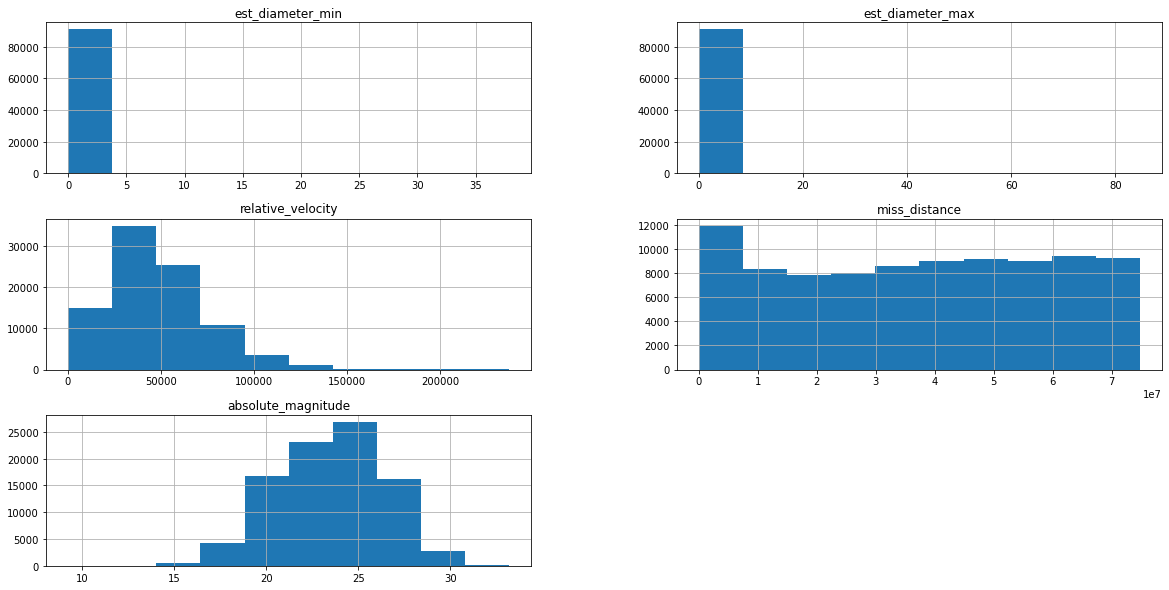

In [767]:
pd.plotting.hist_frame(df.drop(columns=['id', 'name']), figsize=(20,10));

In [768]:
df_downsampled = df.copy()

In [769]:
df_downsampled = df_downsampled.groupby('hazardous', group_keys=False).apply(lambda df_downsampled: df_downsampled.sample(8840))

In [770]:
df_downsampled = df_downsampled.reset_index()

In [771]:
df_downsampled

,index,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,89053,54245579,(2022 CN2),0.009921,0.022184,58837.876198,3.141432e+06,Earth,False,27.14,False
1,36449,3787087,(2017 UD1),0.029144,0.065169,43891.232645,1.185666e+07,Earth,False,24.80,False
2,5911,54169408,(2021 NT5),0.010013,0.022389,27949.425188,6.588638e+07,Earth,False,27.12,False
3,19531,3843342,(2019 ON),0.024241,0.054205,60371.077559,6.592943e+07,Earth,False,25.20,False
4,36937,3588018,(2011 WR2),0.023150,0.051765,45015.029173,7.489281e+06,Earth,False,25.30,False
...,...,...,...,...,...,...,...,...,...,...,...
17675,69459,3731242,(2015 TD323),0.277048,0.619498,99592.214813,2.463266e+07,Earth,False,19.91,True
17676,81226,3752785,(2016 FG60),0.152952,0.342011,74480.171690,6.752498e+07,Earth,False,21.20,True
17677,66825,3714454,(2015 FS117),0.110804,0.247765,53579.441172,4.083238e+07,Earth,False,21.90,True
17678,69426,3449591,(2009 EP2),0.127220,0.284472,71706.156946,4.606436e+07,Earth,False,21.60,True


In [772]:
df.hazardous.value_counts(normalize=True)

False    0.902682
True     0.097318
Name: hazardous, dtype: float64

False    8840
True     8840
Name: hazardous, dtype: int64


C:\Users\valer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


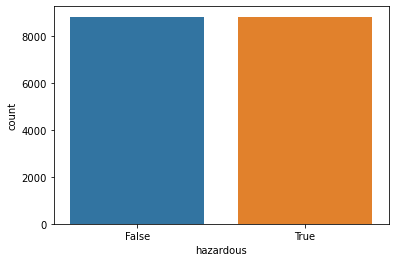

In [773]:
print(df_downsampled['hazardous'].value_counts())
sns.countplot(df_downsampled['hazardous'])
plt.show()

In [774]:
df_downsampled.drop(['id','name','sentry_object','orbiting_body'],axis=1,inplace=True)

<AxesSubplot:>

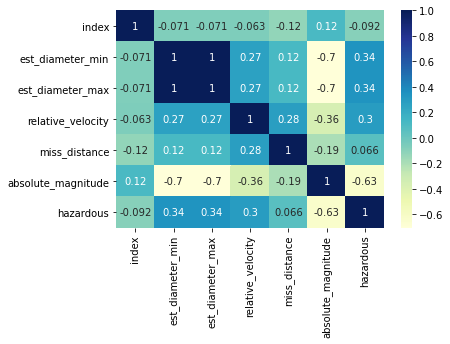

In [775]:
sns.heatmap(df_downsampled.corr(),annot=True,cmap="YlGnBu")

In [776]:
df_downsampled['hazardous'] = df_downsampled['hazardous'].apply(lambda x: 0 if x==False else 1)
df_downsampled.head()

,index,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,89053,0.009921,0.022184,58837.876198,3.141432e+06,27.14,0
1,36449,0.029144,0.065169,43891.232645,1.185666e+07,24.80,0
2,5911,0.010013,0.022389,27949.425188,6.588638e+07,27.12,0
3,19531,0.024241,0.054205,60371.077559,6.592943e+07,25.20,0
4,36937,0.023150,0.051765,45015.029173,7.489281e+06,25.30,0


In [777]:
fe=df_downsampled['est_diameter_max']-df_downsampled['est_diameter_min']

In [778]:
df_downsampled.insert(4,'est_diameter_diff',fe)

In [779]:
df_downsampled.head()

,index,est_diameter_min,est_diameter_max,relative_velocity,est_diameter_diff,miss_distance,absolute_magnitude,hazardous
0,89053,0.009921,0.022184,58837.876198,0.012263,3.141432e+06,27.14,0
1,36449,0.029144,0.065169,43891.232645,0.036024,1.185666e+07,24.80,0
2,5911,0.010013,0.022389,27949.425188,0.012376,6.588638e+07,27.12,0
3,19531,0.024241,0.054205,60371.077559,0.029964,6.592943e+07,25.20,0
4,36937,0.023150,0.051765,45015.029173,0.028615,7.489281e+06,25.30,0


In [780]:
X=df_downsampled.iloc[:,1:-1]
X.head()

,est_diameter_min,est_diameter_max,relative_velocity,est_diameter_diff,miss_distance,absolute_magnitude
0,0.009921,0.022184,58837.876198,0.012263,3.141432e+06,27.14
1,0.029144,0.065169,43891.232645,0.036024,1.185666e+07,24.80
2,0.010013,0.022389,27949.425188,0.012376,6.588638e+07,27.12
3,0.024241,0.054205,60371.077559,0.029964,6.592943e+07,25.20
4,0.023150,0.051765,45015.029173,0.028615,7.489281e+06,25.30


In [781]:
y=df_downsampled.iloc[:,-1]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: hazardous, dtype: int64

In [782]:
y.value_counts()

0    8840
1    8840
Name: hazardous, dtype: int64

In [783]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [784]:
X_train,x_test,Y_train,y_test=train_test_split(X, y,test_size=0.2)

In [785]:
rf = RandomForestClassifier()

In [786]:
from sklearn.pipeline import make_pipeline



pipe = make_pipeline(rf)

In [787]:
pipe.fit(X_train, Y_train)

Pipeline(steps=[('randomforestclassifier', RandomForestClassifier())])

In [788]:
predictions = pipe.predict(x_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.92      0.80      0.85      1753
           1       0.82      0.93      0.87      1783

    accuracy                           0.86      3536
   macro avg       0.87      0.86      0.86      3536
weighted avg       0.87      0.86      0.86      3536



### Grid search

In [789]:
from sklearn.model_selection import GridSearchCV as grid

In [790]:
parameters = [{'randomforestclassifier__criterion': ['gini', 'entropy'],
                'randomforestclassifier__min_samples_leaf': [5, 10, 20, 30, 50, 80, 100],
                'randomforestclassifier__max_depth': [3, 4, 6, 8, 10],
                'randomforestclassifier__min_samples_split': [2, 4, 6, 8, 10]}]

In [791]:

rf_gs = grid(pipe, parameters, cv=5, scoring='f1_macro', n_jobs=-1, verbose=1, refit=True)

In [792]:
rf_gs.fit(X_train, Y_train)

Fitting 5 folds for each of 350 candidates, totalling 1750 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('randomforestclassifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid=[{'randomforestclassifier__criterion': ['gini',
                                                                'entropy'],
                          'randomforestclassifier__max_depth': [3, 4, 6, 8, 10],
                          'randomforestclassifier__min_samples_leaf': [5, 10,
                                                                       20, 30,
                                                                       50, 80,
                                                                       100],
                          'randomforestclassifier__min_samples_split': [2, 4, 6,
                                                                        8,
                                                                        10]}],
             scoring='f1_macro', verbose=1)

In [793]:
rf_gs.best_score_

0.8756218441451968

In [795]:
rf_gs.best_estimator_

Pipeline(steps=[('randomforestclassifier',
                 RandomForestClassifier(max_depth=10, min_samples_leaf=5,
                                        min_samples_split=6))])

In [796]:
predictions = rf_gs.predict(x_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.76      0.86      1753
           1       0.81      0.99      0.89      1783

    accuracy                           0.87      3536
   macro avg       0.89      0.87      0.87      3536
weighted avg       0.89      0.87      0.87      3536



In [797]:
results = pd.DataFrame(rf_gs.cv_results_)

In [798]:
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestclassifier__criterion,param_randomforestclassifier__max_depth,param_randomforestclassifier__min_samples_leaf,param_randomforestclassifier__min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.796928,0.013977,0.034378,0.006250,gini,3,5,2,"{'randomforestclassifier__criterion': 'gini', ...",0.880182,0.874195,0.867978,0.866473,0.875796,0.872925,0.005072,221
1,0.790679,0.012502,0.037500,0.007654,gini,3,5,4,"{'randomforestclassifier__criterion': 'gini', ...",0.880200,0.874195,0.868718,0.866102,0.874673,0.872778,0.004934,227
2,0.759425,0.071677,0.031252,0.000001,gini,3,5,6,"{'randomforestclassifier__criterion': 'gini', ...",0.879833,0.870870,0.867978,0.864989,0.874673,0.871669,0.005188,254
3,0.650042,0.071676,0.021877,0.007655,gini,3,5,8,"{'randomforestclassifier__criterion': 'gini', ...",0.881336,0.870130,0.868348,0.867584,0.876532,0.872786,0.005309,225
4,0.543784,0.011693,0.025002,0.007655,gini,3,5,10,"{'randomforestclassifier__criterion': 'gini', ...",0.881667,0.870130,0.868348,0.866473,0.876532,0.872630,0.005646,234


In [799]:
results[['params', 'mean_test_score']].sort_values('mean_test_score', ascending=False)

,params,mean_test_score
142,"{'randomforestclassifier__criterion': 'gini', ...",0.875622
107,"{'randomforestclassifier__criterion': 'gini', ...",0.875599
140,"{'randomforestclassifier__criterion': 'gini', ...",0.875535
143,"{'randomforestclassifier__criterion': 'gini', ...",0.875466
108,"{'randomforestclassifier__criterion': 'gini', ...",0.875387
...,...,...
206,{'randomforestclassifier__criterion': 'entropy...,0.869091
207,{'randomforestclassifier__criterion': 'entropy...,0.869025
208,{'randomforestclassifier__criterion': 'entropy...,0.868863
209,{'randomforestclassifier__criterion': 'entropy...,0.868411


In [800]:
y_pred=rf_gs.predict(x_test)
y_pred

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [801]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.76      0.86      1753
           1       0.81      0.99      0.89      1783

    accuracy                           0.87      3536
   macro avg       0.89      0.87      0.87      3536
weighted avg       0.89      0.87      0.87      3536



In [802]:
confusion_matrix(y_test,y_pred)

array([[1327,  426],
       [  23, 1760]], dtype=int64)

<AxesSubplot:>

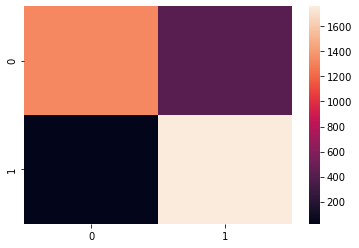

In [803]:
sns.heatmap(confusion_matrix(y_test,y_pred))

## Deep model

In [804]:
import tensorflow as tf
import numpy as np

# to get reproducible results:
np.random.seed(1234)
tf.random.set_seed(1234)

In [805]:
Y_train = np.asarray(Y_train).astype('float32') # float, not int!!!
y_test = np.asarray(y_test).astype('float32') # also the class label: you'll see why
print(Y_train.shape)
print(y_test.shape)

(14144,)
(3536,)


In [815]:
from tensorflow import keras
from keras import models
from keras import layers

early_stopping = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

model = models.Sequential()
model.add(layers.Input(shape=(6)))
model.add(layers.Dense(32, activation= 'softmax', name='sigmoid1'))
model.add(layers.Dense(16, activation= 'softmax', name='sigmoid2'))
model.add(layers.Dense(1, activation='sigmoid', name='sigmoid3'))
model.summary() # explain params

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sigmoid1 (Dense)            (None, 32)                224       
                                                                 
 sigmoid2 (Dense)            (None, 16)                528       
                                                                 
 sigmoid3 (Dense)            (None, 1)                 17        
                                                                 
Total params: 769
Trainable params: 769
Non-trainable params: 0
_________________________________________________________________


In [816]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # Lo mismo que el otro, un pichitun mas alto en la diezmilésima
              loss='BinaryCrossentropy',
              metrics=['BinaryAccuracy'])


In [817]:
num_epochs = 50
history = model.fit(x = X_train, y = Y_train, epochs=num_epochs)

Epoch 1/50
442/442 [==============================] - 1s 2ms/step - loss: 0.6921 - binary_accuracy: 0.5208
Epoch 2/50
442/442 [==============================] - 1s 2ms/step - loss: 0.6776 - binary_accuracy: 0.7562
Epoch 3/50
442/442 [==============================] - 1s 2ms/step - loss: 0.6173 - binary_accuracy: 0.7820
Epoch 4/50
442/442 [==============================] - 1s 2ms/step - loss: 0.5278 - binary_accuracy: 0.8112
Epoch 5/50
442/442 [==============================] - 1s 2ms/step - loss: 0.4610 - binary_accuracy: 0.8317
Epoch 6/50
442/442 [==============================] - 1s 2ms/step - loss: 0.4203 - binary_accuracy: 0.8407
Epoch 7/50
442/442 [==============================] - 1s 1ms/step - loss: 0.3957 - binary_accuracy: 0.8476
Epoch 8/50
442/442 [==============================] - 1s 1ms/step - loss: 0.3798 - binary_accuracy: 0.8521
Epoch 9/50
442/442 [==============================] - 1s 1ms/step - loss: 0.3688 - binary_accuracy: 0.8545
Epoch 10/50
442/442 [================

In [818]:
y_test

array([1., 0., 0., ..., 0., 1., 1.], dtype=float32)

In [819]:
y_pred=model.predict(x_test)
y_pred


111/111 [==============================] - 0s 1ms/step


array([[7.8197634e-01],
       [2.5716424e-04],
       [2.5525689e-04],
       ...,
       [7.9828584e-01],
       [7.7429557e-01],
       [9.0228689e-01]], dtype=float32)

In [820]:
# extract the predicted probabilities
#p_pred = model.predict(X_test)
y_pred = y_pred.flatten()
print(y_pred.round(2))


# extract the predicted class labels
y_pred1 = np.where(y_pred > 0.5, 1, 0)
print(y_pred1)
# [1 0 1 1 0 1 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 ...

[0.78 0.   0.   ... 0.8  0.77 0.9 ]
[1 0 0 ... 1 1 1]


In [821]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

         0.0       0.98      0.74      0.84      1753
         1.0       0.80      0.98      0.88      1783

    accuracy                           0.86      3536
   macro avg       0.89      0.86      0.86      3536
weighted avg       0.88      0.86      0.86      3536



In [822]:
confusion_matrix(y_test,y_pred1)

array([[1305,  448],
       [  33, 1750]], dtype=int64)

<AxesSubplot:>

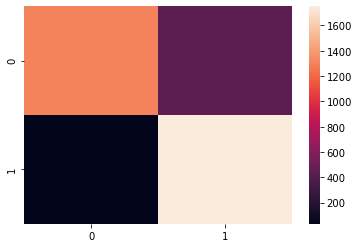

In [823]:
sns.heatmap(confusion_matrix(y_test,y_pred1))